In [1]:
import jaxpv
from jax import numpy as np, grad, jacfwd, jit, ops
import matplotlib.pyplot as plt

In [2]:
N = 500
grid = np.linspace(0, 3e-4, N)
cell = jaxpv.simulator.create_cell(grid)
material = jaxpv.materials.load_material("Si")
material = jaxpv.materials.update(material, A=1e4)
cell = jaxpv.simulator.add_material(cell, material, lambda _: True)
cell = jaxpv.simulator.contacts(cell, 1e7, 0, 0, 1e7)
cell = jaxpv.simulator.single_pn_junction(cell, 1e17, -1e15, 5e-6)
ls = jaxpv.simulator.incident_light(kind="sun")

In [3]:
f = jaxpv.simulator.efficiency
df = grad(f)
obj = f(cell, ls)
dobj = df(cell, ls)

Solving equilibrium...
	 iteration: 1          error: 41.13642567240284
	 iteration: 2          error: 33.504281267105455
	 iteration: 3          error: 23.29819047250992
	 iteration: 4          error: 14.150280436177582
	 iteration: 5          error: 7.056006519891492
	 iteration: 6          error: 2.799726615491106
	 iteration: 7          error: 0.6490725194878566
	 iteration: 8          error: 0.026407195350058008
	 iteration: 9          error: 0.00019275696695528945
	 iteration: 10         error: 1.2553058008651092e-08
Solving for V = 0.0
	 iteration: 1          error: 4219.858925720522
	 iteration: 2          error: 0.41854697231176285
	 iteration: 3          error: 0.11633576772241136
	 iteration: 4          error: 0.007315459414078653
	 iteration: 5          error: 2.688883517027731e-05
	 iteration: 6          error: 3.615192006142403e-10
Solving for V = 0.014351523775676034
	 iteration: 1          error: 4.7465466574189845
	 iteration: 2          error: 0.7808986046562323
	 ite

In [12]:
delta = .1
values = []

for i in np.arange(0, 500):
    new_cell = new_cell = jaxpv.simulator.update(cell, Eg=ops.index_add(cell.Eg, ops.index[i], delta))
    obj_new = f(new_cell, ls)
    values.append(obj_new)

Solving equilibrium...
	 iteration: 1          error: 41.13642567240284
	 iteration: 2          error: 33.504281267105455
	 iteration: 3          error: 23.29819047250992
	 iteration: 4          error: 14.150280436177582
	 iteration: 5          error: 7.056006519891492
	 iteration: 6          error: 2.799726615491106
	 iteration: 7          error: 0.6490725194878566
	 iteration: 8          error: 0.026407195350058008
	 iteration: 9          error: 0.00019275696695528945
	 iteration: 10         error: 1.2553058008651092e-08
Solving for V = 0.0
	 iteration: 1          error: 4220.127913739608
	 iteration: 2          error: 0.41854697598581636
	 iteration: 3          error: 0.11633577005941347
	 iteration: 4          error: 0.00731545971950668
	 iteration: 5          error: 2.6888837404606514e-05
	 iteration: 6          error: 3.6152854211567055e-10
Solving for V = 0.014351523775676034
	 iteration: 1          error: 4.747153802720127
	 iteration: 2          error: 0.7809050508838484
	 ite

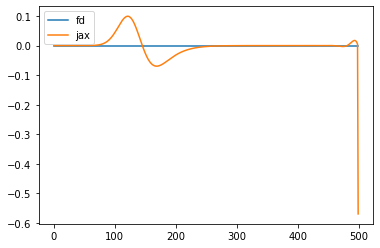

In [14]:
obj_new = np.array(values)
dobj_fd = (obj_new - obj) / delta

plt.plot(np.arange(0, 500), dobj_fd, label="fd")
plt.plot(dobj.Eg, label="jax")
plt.legend()
plt.show()

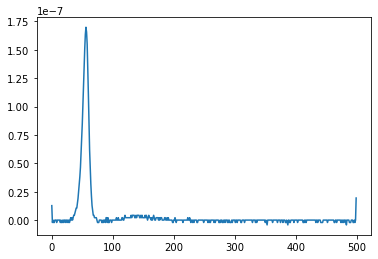

In [15]:
plt.plot(dobj_fd)